Install DeepLabCut and a compatible CUDA version

In [ ]:
# Install DeepLabCut
!apt update && apt install cuda-11-8
!pip install "deeplabcut[tf]"

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 119 kB in 2s (50.0 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
46 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree..

Import the required libraries

In [2]:
import deeplabcut
import pandas as pd
import numpy as np
import time
import seaborn as sns

Loading DLC 2.3.9...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


Double Check that the GPU is working

In [3]:
from tensorflow.test import is_gpu_available
print(f'GPU available: {is_gpu_available()}')

GPU available: True


Clone the sample data from github and move into the newly-created directory

In [4]:
!git clone https://github.com/tlancaster6/DLC_Demo DLC_demo_data
%cd /content/DLC_demo_data


fatal: destination path 'DLC_demo_data' already exists and is not an empty directory.
/content/DLC_demo_data


Load demo data

In [5]:
config_path = '/content/DLC_demo_data/config.yaml'
deeplabcut.load_demo_data(config_path)

This is not an official demo dataset.
Loaded, now creating training data...
Utilizing the following graph: [[0, 1], [0, 2], [1, 2]]
Creating training data for: Shuffle: 1 TrainFraction:  0.95


100%|██████████| 19/19 [00:00<00:00, 556.18it/s]

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


Train network for 1000 iterations

In [6]:
epochs = 1000
start = time.time()
deeplabcut.train_network(config_path, shuffle=1, displayiters=10, saveiters=100, maxiters=epochs)
duration = time.time() - start
print(f'total training time: {duration} seconds')
print(f'time per epoch: {duration/epochs} seconds')

Config:
{'all_joints': [[0], [1], [2]],
 'all_joints_names': ['nose', 'dorsal_fin', 'peduncle'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 8,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'crop_sampling': 'hybrid',
 'crop_size': [400, 400],
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_DLC_demoOct10/DLC_demo_Tucker95shuffle1.pickle',
 'dataset_type': 'multi-animal-imgaug',
 'decay_steps': 30000,
 'deterministic': False,
 'display_iters': 500,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/usr/local/lib/python3.10/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate

Selecting multi-animal trainer
Activating limb prediction...
Batch Size is 8
Getting specs multi-animal-imgaug 3 3


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Loading ImageNet-pretrained resnet_50
Max_iters overwritten as 1000
Display_iters overwritten as 10
Save_iters overwritten as 100
Training parameters:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/content/DLC_demo_data/dlc-models/iteration-0/DLC_demoOct10-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'adam', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 8, 'dataset_type': 'multi-animal-imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': True, 'pairwise_predict': True, 'all_joints': [[0], [1], [2]]

iteration: 10 loss: 0.3534 scmap loss: 0.2689 locref loss: 0.0159 limb loss: 0.0685 lr: 0.0001
iteration: 20 loss: 0.0616 scmap loss: 0.0403 locref loss: 0.0052 limb loss: 0.0161 lr: 0.0001
iteration: 30 loss: 0.0407 scmap loss: 0.0314 locref loss: 0.0026 limb loss: 0.0068 lr: 0.0001
iteration: 40 loss: 0.0356 scmap loss: 0.0293 locref loss: 0.0018 limb loss: 0.0046 lr: 0.0001
iteration: 50 loss: 0.0303 scmap loss: 0.0252 locref loss: 0.0013 limb loss: 0.0038 lr: 0.0001
iteration: 60 loss: 0.0314 scmap loss: 0.0273 locref loss: 0.0010 limb loss: 0.0031 lr: 0.0001
iteration: 70 loss: 0.0245 scmap loss: 0.0212 locref loss: 0.0009 limb loss: 0.0025 lr: 0.0001
iteration: 80 loss: 0.0243 scmap loss: 0.0213 locref loss: 0.0008 limb loss: 0.0023 lr: 0.0001
iteration: 90 loss: 0.0256 scmap loss: 0.0226 locref loss: 0.0007 limb loss: 0.0023 lr: 0.0001
iteration: 100 loss: 0.0249 scmap loss: 0.0224 locref loss: 0.0006 limb loss: 0.0019 lr: 0.0001
iteration: 110 loss: 0.0220 scmap loss: 0.0195 lo

The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.
total training time: 367.2646412849426 seconds
time per epoch: 0.36726464128494263 seconds


Evaluate the network

In [7]:
deeplabcut.evaluate_network(config_path, Shuffles=[1])

Config:
{'all_joints': [[0], [1], [2]],
 'all_joints_names': ['nose', 'dorsal_fin', 'peduncle'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_DLC_demoOct10/DLC_demo_Tucker95shuffle1.pickle',
 'dataset_type': 'multi-animal-imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/usr/local/lib/python3.10/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_smooth': False,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'minconfidence': 0.01,
 'mirror': False,
 'multi_stage': True,
 'net_type': 'resnet_50',
 'nmsradius': 5.0,
 'num_idchannel': 2,
 'num_joints': 3,
 'num_limbs': 3,
 'optimizer': 'sgd',
 'pairwise_huber_loss': True,
 'pairwise_predict': False

Running  DLC_dlcrnetms5_DLC_demoOct10shuffle1_1000  with # of trainingiterations: 1000
Activating extracting of PAFs
Network Evaluation underway...


20it [00:03,  6.00it/s]


Results for 1000 training iterations, training fraction of 95, and shuffle 1:
Train error: 3.14 pixels. Test error: 4.63 pixels.
With pcutoff of 0.6:
Train error: 3.1 pixels. Test error: 4.63 pixels.
##########################################
Average Euclidean distance to GT per individual (in pixels; test-only)
individuals
female    5.15504
male      4.10412
Average Euclidean distance to GT per bodypart (in pixels; test-only)
bodyparts
dorsal_fin    4.314178
nose          5.393647
peduncle      4.180915
Done and results stored for snapshot:  snapshot-1000
Selecting best skeleton...
Graph 1|2


100%|██████████| 20/20 [00:00<00:00, 1884.06it/s]

Graph 2|2



100%|██████████| 20/20 [00:00<00:00, 1889.45it/s]


Perform pose estimation and tracking on the sample video clip

In [8]:
video_path = '/content/DLC_demo_data/videos/BHVE_group1_097200-098999.mp4'
deeplabcut.analyze_videos(config_path,[video_path], shuffle=1, videotype="mp4", auto_track=True)

Config:
{'all_joints': [[0], [1], [2]],
 'all_joints_names': ['nose', 'dorsal_fin', 'peduncle'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_DLC_demoOct10/DLC_demo_Tucker95shuffle1.pickle',
 'dataset_type': 'multi-animal-imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/usr/local/lib/python3.10/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_smooth': False,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'minconfidence': 0.01,
 'mirror': False,
 'multi_stage': True,
 'net_type': 'resnet_50',
 'nmsradius': 5.0,
 'num_idchannel': 2,
 'num_joints': 3,
 'num_limbs': 3,
 'optimizer': 'sgd',
 'paf_best': [0, 2],
 'pairwise_huber_loss': True,
 'pai

Using snapshot-1000 for model /content/DLC_demo_data/dlc-models/iteration-0/DLC_demoOct10-trainset95shuffle1
Activating extracting of PAFs
Starting to analyze %  /content/DLC_demo_data/videos/BHVE_group1_097200-098999.mp4
Loading  /content/DLC_demo_data/videos/BHVE_group1_097200-098999.mp4
Duration of video [s]:  60.0 , recorded with  30.0 fps!
Overall # of frames:  1800  found with (before cropping) frame dimensions:  720 900
Starting to extract posture from the video(s) with batchsize: 8


100%|██████████| 1800/1800 [01:36<00:00, 18.57it/s]
Config:
{'all_joints': [[0], [1], [2]],
 'all_joints_names': ['nose', 'dorsal_fin', 'peduncle'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_DLC_demoOct10/DLC_demo_Tucker95shuffle1.pickle',
 'dataset_type': 'multi-animal-imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/usr/local/lib/python3.10/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_smooth': False,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'minconfidence': 0.01,
 'mirror': False,
 'multi_stage': True,
 'net_type': 'resnet_50',
 'nmsradius': 5.0,
 'num_idchannel': 2,
 'num_joints': 3,
 'num_limbs': 3,
 'optimizer': 'sgd',
 'pa

Video Analyzed. Saving results in /content/DLC_demo_data/videos...
Using snapshot-1000 for model /content/DLC_demo_data/dlc-models/iteration-0/DLC_demoOct10-trainset95shuffle1
Processing...  /content/DLC_demo_data/videos/BHVE_group1_097200-098999.mp4
Analyzing /content/DLC_demo_data/videos/BHVE_group1_097200-098999DLC_dlcrnetms5_DLC_demoOct10shuffle1_1000.h5


100%|██████████| 1720/1720 [00:01<00:00, 959.72it/s] 
1720it [00:07, 229.73it/s] 


The tracklets were created (i.e., under the hood deeplabcut.convert_detections2tracklets was run). Now you can 'refine_tracklets' in the GUI, or run 'deeplabcut.stitch_tracklets'.
Processing...  /content/DLC_demo_data/videos/BHVE_group1_097200-098999.mp4


100%|██████████| 39/39 [00:00<00:00, 255.12it/s]


The videos are analyzed. Time to assemble animals and track 'em... 
 Call 'create_video_with_all_detections' to check multi-animal detection quality before tracking.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_dlcrnetms5_DLC_demoOct10shuffle1_1000'

Visualize the pose estimation and tracking results

In [9]:
deeplabcut.create_labeled_video(
    config_path,
    [video_path],
    videotype='mp4',
    shuffle=1,
    color_by="individual",
)

Starting to process video: /content/DLC_demo_data/videos/BHVE_group1_097200-098999.mp4
Loading /content/DLC_demo_data/videos/BHVE_group1_097200-098999.mp4 and data.
Duration of video [s]: 60.0, recorded with 30.0 fps!
Overall # of frames: 1800 with cropped frame dimensions: 720 900
Generating frames and creating video.


100%|██████████| 1800/1800 [00:11<00:00, 153.15it/s]


[True]

Plot trajectories

In [10]:
deeplabcut.plot_trajectories(config_path, [video_path], shuffle=1 ,videotype='mp4')

Loading  /content/DLC_demo_data/videos/BHVE_group1_097200-098999.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory


Load and Examine the pose data

In [11]:
import pandas as pd
df = pd.read_hdf('/content/DLC_demo_data/videos/BHVE_group1_097200-098999DLC_dlcrnetms5_DLC_demoOct10shuffle1_1000_el.h5')

In [12]:
df.head()

scorer      DLC_dlcrnetms5_DLC_demoOct10shuffle1_1000                      \
individuals                                      male                       
bodyparts                                        nose                       
coords                                              x        y likelihood   
0                                             195.605  260.064      0.997   
1                                             200.955  249.883      0.996   
2                                             205.179  243.137      0.999   
3                                             212.453  242.841      0.999   
4                                             217.968  237.346      0.998   

scorer                                                                   \
individuals                                                               
bodyparts   dorsal_fin                     peduncle                       
coords               x        y likelihood        x        y likelihood   
0              195.364  285.082      0.970  219.702  330.675      0.602   
1              188.790  283.693      0.964  205.674  324.065      0.849   
2              189.774  278.051      0.994  205.539  323.934      0.927   
3              189.150  273.328      0.993  195.300  322.157      0.947   
4              194.007  269.014      0.987  179.190  315.345      0.956   

scorer                                                                   \
individuals   female                                                      
bodyparts       nose                     dorsal_fin                       
coords             x        y likelihood          x        y likelihood   
0            267.241  307.638      0.985    260.689  278.068      0.965   
1            265.937  307.608      0.992    261.871  279.495      0.984   
2            265.666  307.712      0.993    261.488  280.102      0.988   
3            265.481  308.002      0.991    261.206  279.649      0.986   
4            265.052  308.290      0.987    261.184  278.222      0.966   

scorer                                    
individuals                               
bodyparts   peduncle                      
coords             x        y likelihood  
0            260.790  212.002      0.477  
1            260.459  211.426      0.602  
2            268.135  212.187      0.537  
3            260.569  212.038      0.673  
4            260.320  211.912      0.849

In [13]:
idx = pd.IndexSlice
dists = []
for id1, id2  in [['male', 'female'], ['female', 'male']]:
  deltas = df.loc[:, idx[:, id1, 'nose', :]].values - df.loc[:, idx[:, id2, 'peduncle', :]].values
  dists.append(np.hypot(deltas[:, 0], deltas[:, 1]))
dists = pd.DataFrame(dists).T

<Axes: >

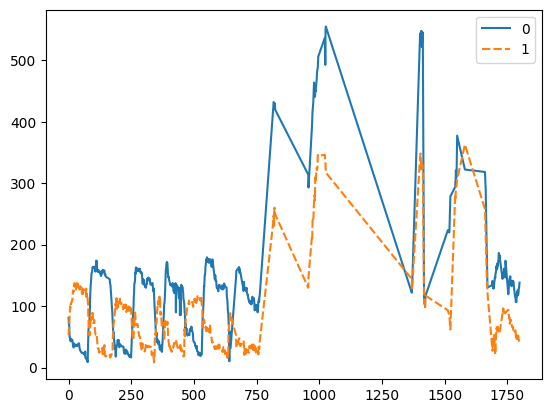

In [14]:
sns.lineplot(dists)